In [ ]:
# !pip install arviz -q #==0.6.1
# !pip install theano-pymc -q
# !pip install pymc3==3.10.0 -q # 3.9.3 -q #
!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

     |████████████████████████████████| 1.4MB 4.6MB/s 
     |████████████████████████████████| 4.7MB 18.4MB/s 
     |████████████████████████████████| 317kB 38.3MB/s 
     |████████████████████████████████| 911kB 4.7MB/s 
     |████████████████████████████████| 2.8MB 5.9MB/s 


In [ ]:
import numpy as np
import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
import arviz as az

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


In [ ]:
"""
rTCR_diff_array
rTCR is the relative phosphorylation: pTCR_density/TCR_density.
diff means it is the edge value minus the values near the origin.
the diff in values is devided by their inter distance in nm.
"""
rTCRrMean_array0 = np.array([[0,24.236,22.972,21.559,20.098,18.748,17.619,16.755,16.072,15.568,15.154,14.862,14.618,14.419,14.281,14.141,14.041,13.961,13.889,13.837,13.782],
[0,24.292,23.008,21.65,20.179,18.806,17.665,16.789,16.109,15.604,15.211,14.897,14.646,14.456,14.301,14.17,14.059,13.973,13.911,13.852,13.8],
[0,24.297,23.112,21.693,20.208,18.859,17.734,16.853,16.177,15.655,15.234,14.924,14.681,14.483,14.322,14.193,14.09,13.996,13.919,13.874,13.814],
[0,24.274,23.078,21.735,20.264,18.901,17.791,16.882,16.199,15.684,15.261,14.963,14.704,14.505,14.338,14.211,14.101,14.016,13.941,13.879,13.824],
[0,24.3,23.135,21.756,20.289,18.96,17.827,16.922,16.22,15.709,15.309,14.978,14.733,14.533,14.361,14.238,14.116,14.026,13.948,13.888,13.842],
[0,24.346,23.125,21.774,20.346,18.981,17.885,16.962,16.273,15.733,15.318,15.007,14.742,14.55,14.388,14.245,14.135,14.039,13.971,13.896,13.852],
[0,24.314,23.176,21.805,20.359,19.026,17.867,16.977,16.302,15.766,15.345,15.013,14.765,14.573,14.392,14.258,14.146,14.055,13.979,13.919,13.857],
[0,24.32,23.179,21.86,20.427,19.07,17.936,17.023,16.319,15.807,15.365,15.039,14.785,14.587,14.409,14.272,14.16,14.071,13.994,13.923,13.869],
[0,24.388,23.211,21.846,20.45,19.085,17.962,17.069,16.358,15.812,15.38,15.062,14.801,14.609,14.435,14.296,14.172,14.08,14.003,13.939,13.875],
[0,24.336,23.182,21.879,20.451,19.136,17.951,17.091,16.377,15.831,15.411,15.076,14.825,14.605,14.44,14.298,14.198,14.098,14.01,13.943,13.885],
[0,24.379,23.196,21.867,20.477,19.129,18.024,17.114,16.401,15.85,15.431,15.08,14.833,14.624,14.45,14.316,14.194,14.112,14.027,13.953,13.9],
[0,24.349,23.247,21.903,20.513,19.164,18.039,17.142,16.432,15.886,15.433,15.101,14.847,14.636,14.469,14.315,14.207,14.101,14.023,13.959,13.911],
[0,24.325,23.212,21.922,20.496,19.169,18.042,17.125,16.423,15.899,15.469,15.126,14.865,14.651,14.483,14.333,14.218,14.124,14.048,13.968,13.914],
[0,24.31,23.207,21.945,20.527,19.154,18.087,17.167,16.439,15.902,15.482,15.146,14.871,14.666,14.482,14.348,14.224,14.124,14.041,13.98,13.919],
[0,24.37,23.243,21.943,20.546,19.232,18.076,17.195,16.479,15.934,15.505,15.144,14.884,14.664,14.496,14.35,14.24,14.141,14.058,13.982,13.929],
[0,24.366,23.256,21.954,20.548,19.231,18.098,17.19,16.483,15.946,15.503,15.163,14.899,14.686,14.511,14.358,14.254,14.151,14.068,13.997,13.935],
[0,24.36,23.254,21.97,20.565,19.255,18.12,17.2,16.5,15.943,15.513,15.176,14.914,14.69,14.518,14.369,14.257,14.152,14.065,13.995,13.936],
[0,24.356,23.26,21.957,20.548,19.253,18.138,17.226,16.523,15.956,15.531,15.191,14.919,14.711,14.527,14.384,14.26,14.167,14.08,14,13.939],
[0,24.337,23.217,21.978,20.607,19.303,18.16,17.244,16.538,15.973,15.54,15.198,14.935,14.721,14.551,14.4,14.269,14.164,14.084,14.007,13.959],
[0,24.338,23.256,21.994,20.636,19.268,18.162,17.251,16.546,15.986,15.563,15.217,14.932,14.721,14.541,14.4,14.276,14.176,14.09,14.012,13.956],
[0,24.368,23.24,21.962,20.587,19.31,18.19,17.276,16.543,15.997,15.567,15.227,14.952,14.728,14.543,14.398,14.288,14.179,14.098,14.025,13.965]])


rTCRhMean_array0 = np.array([[0,0.0025602,0.0059766,0.0091453,0.012647,0.017595,0.022466,0.026335,0.030776,0.033278,0.036816,0.038685,0.04055,0.042244,0.043324,0.044142,0.044644,0.043866,0.04366,0.043257,0.042709],
[0,0.0010847,0.0036952,0.0070096,0.010542,0.015491,0.019337,0.023757,0.027443,0.031318,0.034114,0.036207,0.038752,0.04054,0.041208,0.041688,0.042294,0.042597,0.042454,0.042296,0.04198],
[0,0.00046851,0.002546,0.0057152,0.0091251,0.013046,0.017181,0.021768,0.024792,0.028753,0.032383,0.034348,0.037336,0.038842,0.039635,0.040369,0.041106,0.041338,0.04153,0.040824,0.041278],
[0,0.00019683,0.0017371,0.0042384,0.0075241,0.011132,0.015255,0.019846,0.02331,0.027063,0.029732,0.03243,0.035206,0.036902,0.037941,0.0394,0.03969,0.040331,0.040246,0.040184,0.040379],
[0,8.9397e-05,0.0011244,0.0032513,0.0062434,0.0097901,0.013692,0.017219,0.021682,0.025047,0.028608,0.031026,0.033462,0.03502,0.036541,0.037944,0.038589,0.039187,0.039429,0.039272,0.039197],
[0,3.3023e-05,0.00071905,0.0023744,0.0048183,0.0084125,0.01187,0.0158,0.019663,0.022887,0.026691,0.029338,0.031677,0.033255,0.034443,0.036085,0.037361,0.038006,0.037964,0.038467,0.038551],
[0,1.2906e-05,0.00048824,0.0018563,0.0040258,0.0069971,0.010589,0.014055,0.017742,0.02159,0.024214,0.027618,0.029944,0.032084,0.033933,0.034667,0.035681,0.036812,0.036947,0.037404,0.0374],
[0,5.1056e-06,0.00029701,0.0014263,0.0032425,0.0060229,0.0092076,0.012623,0.016068,0.019506,0.022595,0.026056,0.028173,0.030497,0.031938,0.033412,0.034416,0.035072,0.03586,0.03629,0.036406],
[0,2.087e-06,0.00018711,0.0010155,0.0027177,0.0050615,0.0079913,0.011271,0.014607,0.017945,0.021102,0.024424,0.026723,0.028885,0.030776,0.032352,0.033385,0.034186,0.034876,0.035338,0.035823],
[0,8.2099e-07,0.0001135,0.00078492,0.0022245,0.0043856,0.007028,0.01028,0.013633,0.016778,0.019722,0.022314,0.024925,0.027473,0.02948,0.030911,0.03208,0.032986,0.033567,0.034341,0.034735],
[0,2.8229e-07,7.5105e-05,0.00056227,0.0017297,0.003613,0.0061493,0.0089398,0.012002,0.015094,0.01838,0.021095,0.023787,0.025894,0.02815,0.029629,0.030863,0.031698,0.032973,0.033522,0.033741],
[0,1.1182e-07,5.1204e-05,0.00043722,0.0014018,0.0030691,0.0053713,0.0081311,0.010978,0.014162,0.017226,0.019774,0.022256,0.024503,0.026633,0.02842,0.029689,0.030809,0.031534,0.032235,0.032928],
[0,4.2937e-08,3.0337e-05,0.0003216,0.00114,0.0025757,0.004683,0.0072798,0.010126,0.013104,0.015731,0.018606,0.021201,0.023443,0.025461,0.027343,0.028547,0.029885,0.030418,0.03132,0.031793],
[0,1.6289e-08,2.0321e-05,0.00024651,0.00094837,0.0022013,0.0041219,0.0065219,0.0092614,0.011962,0.014664,0.017511,0.020045,0.022282,0.024066,0.026303,0.027295,0.028624,0.029455,0.030334,0.031013],
[0,6.2907e-09,1.1857e-05,0.0001793,0.00073781,0.001818,0.0035332,0.005739,0.0082383,0.010932,0.013672,0.016226,0.018489,0.021037,0.023165,0.024641,0.026146,0.027476,0.028581,0.02956,0.030109],
[0,2.3224e-09,8.0193e-06,0.00012962,0.00059502,0.0015715,0.003098,0.0050716,0.0074731,0.010043,0.012447,0.014967,0.017695,0.019977,0.02209,0.023685,0.025152,0.026457,0.027574,0.028472,0.029214],
[0,1.1069e-09,4.9735e-06,9.9258e-05,0.00047171,0.0013008,0.0026784,0.0045419,0.0067697,0.0092054,0.011725,0.014173,0.016558,0.018846,0.021022,0.02269,0.02415,0.025512,0.026807,0.027633,0.028641],
[0,3.7305e-10,2.9826e-06,7.1446e-05,0.00038548,0.0011439,0.0023471,0.0040642,0.0060471,0.0084257,0.010885,0.01324,0.015931,0.017954,0.019926,0.021714,0.023306,0.024605,0.025782,0.026745,0.027641],
[0,1.5059e-10,1.9439e-06,5.3332e-05,0.0003062,0.00094201,0.0020634,0.0035172,0.0055178,0.0078623,0.0099798,0.012407,0.01451,0.016762,0.018684,0.020619,0.022331,0.023788,0.024872,0.025913,0.026731],
[0,4.8184e-11,1.1624e-06,3.7108e-05,0.00024774,0.00076507,0.0017557,0.0031139,0.005024,0.0069656,0.0092079,0.011521,0.01384,0.015767,0.017832,0.019777,0.021202,0.022745,0.023847,0.025097,0.026009],
[0,2.04e-11,6.9531e-07,2.8478e-05,0.00019344,0.00067276,0.0015635,0.0028098,0.0045028,0.0064331,0.0085375,0.010746,0.012778,0.015071,0.016968,0.018734,0.020389,0.021916,0.022905,0.02418,0.025157]])

rTCRrMean_array = rTCRrMean_array0[:,1:]
rTCRhMean_array = rTCRhMean_array0[:,1:]

depletion = np.linspace(0,200,21) # nm
decayLength = np.linspace(10,200,20)

decayLength_array, depletion_array = np.meshgrid(decayLength, depletion)


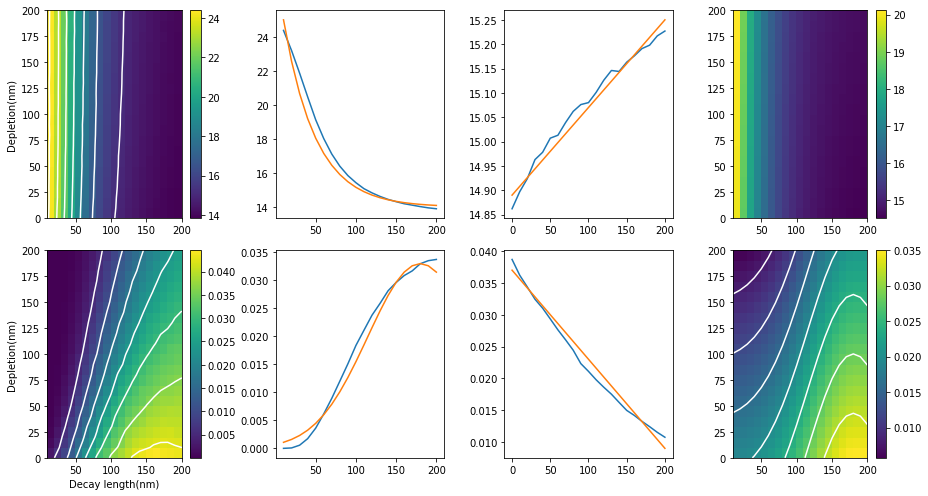

In [ ]:

rm1_dev = 20
rm1_cen= 10 
rm1_min = 14
rm1_max = 25

rm1 = rm1_min+(rm1_max-rm1_min)*np.exp(-0.5*((decayLength-rm1_cen)/rm1_dev))

x2 = depletion
rm2_b = 14.89
rm2_a = 0.0018

rm2 = rm2_b + rm2_a*depletion
###
rm1_array = rm1_min+(rm1_max-rm1_min)*np.exp(-0.5*((decayLength_array-rm1_cen)/rm1_dev))
rm2_array = rm2_b + rm2_a*depletion_array

## hm ######################################################

hm1_sigma = 65
hm1_mu= 180 
hm1_scale = 0.033

hm1 = hm1_scale*np.exp(-0.5*((decayLength-hm1_mu)/hm1_sigma)**2)

x2 = depletion
hm2_b = 0.037
hm2_a = -0.00014

hm2 = hm2_b + hm2_a*depletion

###
hm1_array = hm1_scale*np.exp(-0.5*((decayLength_array-hm1_mu)/hm1_sigma)**2)
hm2_array = hm2_b + hm2_a*depletion_array

# hm2_array = hm2_b + hm2_a*depletion_array
## rTCR_r_mean #############################################
fig, ax0 = plt.subplots(2,4, figsize=[13,7])

im0 = ax0[0,0].pcolor(decayLength, depletion, rTCRrMean_array)
ax0[0,0].contour(decayLength, depletion, rTCRrMean_array, colors='w')
fig.colorbar(im0, ax=ax0[0,0])
# ax0[0,0].set_xlabel('Decay length(nm)')
ax0[0,0].set_ylabel('Depletion(nm)')

ax0[0,1].plot(decayLength, rTCRrMean_array[10,:])
ax0[0,1].plot(decayLength, rm1)


ax0[0,2].plot(depletion, rTCRrMean_array[:,10])
ax0[0,2].plot(depletion, rm2)


rm_array = 0.5*rm1_array + 0.5*rm2_array
im03 = ax0[0,3].pcolor(decayLength, depletion, rm_array)
fig.colorbar(im03, ax=ax0[0,3])


## rTCR_h_mean #############################################

im0 = ax0[1,0].pcolor(decayLength, depletion, rTCRhMean_array)
ax0[1,0].contour(decayLength, depletion, rTCRhMean_array, colors='w')
fig.colorbar(im0, ax=ax0[1,0])
ax0[1,0].set_xlabel('Decay length(nm)')
ax0[1,0].set_ylabel('Depletion(nm)')

ax0[1,1].plot(decayLength, rTCRhMean_array[10,:])
ax0[1,1].plot(decayLength, hm1)


ax0[1,2].plot(depletion, rTCRhMean_array[:,10])
ax0[1,2].plot(depletion, hm2)

hm_array = 0.5*hm1_array + 0.5*hm2_array
im13 = ax0[1,3].pcolor(decayLength, depletion, hm_array)
ax0[1,3].contour(decayLength, depletion, hm_array, colors='w')
fig.colorbar(im13, ax=ax0[1,3])

plt.tight_layout()

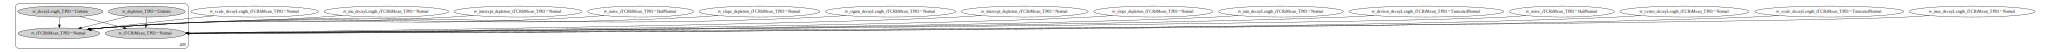

In [ ]:
# ### model3 - TPC (TCR phosphorylation) ##############################
def get_model3_untrained(depletion_array, decayLength_array, rTCRrMean_array, rTCRhMean_array):
    '''
    TODO: add proper documentation

    '''
    model3 = pm.Model()
    with model3:
        # observed x and y
        decayLength_obs = decayLength_array.reshape(-1)
        depletion_obs = depletion_array.reshape(-1)

        # random variables x and y
        rv_decayLength_TP03 = pm.Uniform('rv_decayLength_TP03', 0, 200, observed=decayLength_obs)
        rv_depletion_TP03 = pm.Uniform('rv_depletion_TP03', 0, 200, observed=depletion_obs) 

        # observed 
        rTCRrMean_obs = rTCRrMean_array.reshape(-1)
        rTCRhMean_obs = rTCRhMean_array.reshape(-1)

        ### rTCRrMean ########################################
        rv_noise_rTCRrMean_TP03 = pm.HalfNormal('rv_noise_rTCRrMean_TP03', sd=5) # noise 

        ### rv_***_decayLength_rTCRrMean_TP03 ##################
        rv_devisor_decayLength_rTCRrMean_TP03 = \
        pm.TruncatedNormal('rv_devisor_decayLength_rTCRrMean_TP03',
                  mu=15,
                  sd=2,
                  lower=0)
        
        rv_center_decayLength_rTCRrMean_TP03 = \
        pm.Normal('rv_center_decayLength_rTCRrMean_TP03',
                  mu=10, 
                  sd=2)
        
        rv_min_decayLength_rTCRrMean_TP03 = \
        pm.Normal('rv_min_decayLength_rTCRrMean_TP03',
                  mu=14,
                  sd=3)
        
        rv_max_decayLength_rTCRrMean_TP03 = \
        pm.Normal('rv_max_decayLength_rTCRrMean_TP03',
                  mu=25,
                  sd=3)
        
        rv_scale_decayLength_rTCRrMean_TP03 = \
        pm.TruncatedNormal('rv_scale_decayLength_rTCRrMean_TP03',
                  mu=1,
                  sd=0.3,
                  lower=0)
        
        rv_decayLength_rTCRrMean_TP03 = \
        rv_scale_decayLength_rTCRrMean_TP03*\
        (rv_min_decayLength_rTCRrMean_TP03 + \
        (rv_max_decayLength_rTCRrMean_TP03 - rv_min_decayLength_rTCRrMean_TP03)*\
        np.exp(-0.5*(rv_decayLength_TP03 - rv_center_decayLength_rTCRrMean_TP03)/\
                     rv_devisor_decayLength_rTCRrMean_TP03))

        
        ### rv_***_depletion_rTCRrMean_TP ##################       
        rv_intercept_depletion_rTCRrMean_TP03 = \
        pm.Normal('rv_intercept_depletion_rTCRrMean_TP03',
                  mu=15,
                  sd=3)
        
        rv_slope_depletion_rTCRrMean_TP03 = \
        pm.Normal('rv_slope_depletion_rTCRrMean_TP03',
                  mu=0.0,
                  sd=0.01)

        rv_depletion_rTCRrMean_TP03 = \
        rv_intercept_depletion_rTCRrMean_TP03 + \
        rv_slope_depletion_rTCRrMean_TP03*rv_depletion_TP03
        
        ### different parameters combined:
        rv_rTCRrMean_TP03 = \
        pm.Normal('rv_rTCRrMean_TP03', 
                  mu=rv_decayLength_rTCRrMean_TP03 + \
                  rv_depletion_rTCRrMean_TP03, 
                  sd=rv_noise_rTCRrMean_TP03,
                  observed=rTCRrMean_obs)
              
        ### rTCRhMean ########################################
        # rv_variableName_parameterName_heatmapName_modelNameModelIndex:
        rv_noise_rTCRhMean_TP03 = \
        pm.HalfNormal('rv_noise_rTCRhMean_TP03', sd=1) # noise 0.01

        ### rv_***_decayLength_rTCRhMean_TP: ################
        rv_sigma_decayLength_rTCRhMean_TP03 = \
        pm.Normal('rv_sigma_decayLength_rTCRhMean_TP03',
                  mu=70,
                  sd=10)
        
        rv_mu_decayLength_rTCRhMean_TP03 = \
        pm.Normal('rv_mu_decayLength_rTCRhMean_TP03',
                  mu=180,
                  sd=30)
         
        rv_scale_decayLength_rTCRhMean_TP03 = \
        pm.Normal('rv_scale_decayLength_rTCRhMean_TP03',
                  mu=1,
                  sd=0.3)
                 
        rv_decayLength_rTCRhMean_TP03 = \
        rv_scale_decayLength_rTCRhMean_TP03*\
        np.exp(-0.5*((rv_decayLength_TP03 - rv_mu_decayLength_rTCRhMean_TP03)/\
                     rv_sigma_decayLength_rTCRhMean_TP03)**2)
        
        ### rv_***_depletion_rTCRhMean_TP03 #############       
        rv_intercept_depletion_rTCRhMean_TP03 = \
        pm.Normal('rv_intercept_depletion_rTCRhMean_TP03',
                  mu=0.04,
                  sd=0.02)
        
        rv_slope_depletion_rTCRhMean_TP03 = \
        pm.Normal('rv_slope_depletion_rTCRhMean_TP03',
                  mu=0.0,
                  sd=0.01)
        
        rv_depletion_rTCRhMean_TP03 = rv_intercept_depletion_rTCRhMean_TP03 + \
        rv_slope_depletion_rTCRhMean_TP03*rv_depletion_TP03
        
        ### different parameters combined:
        rv_rTCRhMean_TP03 = \
        pm.Normal('rv_rTCRhMean_TP03', 
                  mu=rv_decayLength_rTCRhMean_TP03 + \
                  rv_depletion_rTCRhMean_TP03, 
                  sd=rv_noise_rTCRhMean_TP03,
                  observed=rTCRhMean_obs)
        
        ######################################################

    return model3

model3 = get_model3_untrained(depletion_array, decayLength_array, 
                              rTCRrMean_array, rTCRhMean_array)

gv3 = pm.model_to_graphviz(model3)
gv3  


In [ ]:
with model3:
    trace3 = pm.sample(2000, chains=4);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_slope_depletion_rTCRhMean_TP03, rv_intercept_depletion_rTCRhMean_TP03, rv_scale_decayLength_rTCRhMean_TP03, rv_mu_decayLength_rTCRhMean_TP03, rv_sigma_decayLength_rTCRhMean_TP03, rv_noise_rTCRhMean_TP03, rv_slope_depletion_rTCRrMean_TP03, rv_intercept_depletion_rTCRrMean_TP03, rv_scale_decayLength_rTCRrMean_TP03, rv_max_decayLength_rTCRrMean_TP03, rv_min_decayLength_rTCRrMean_TP03, rv_center_decayLength_rTCRrMean_TP03, rv_devisor_decayLength_rTCRrMean_TP03, rv_noise_rTCRrMean_TP03]
Sampling chain 3, 0 divergences: 100%|██████████| 2500/2500 [12:19<00:00,  3.38it/s]
The acceptance probability does not match the target. It is 0.9501790353065773, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.95264015047835, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

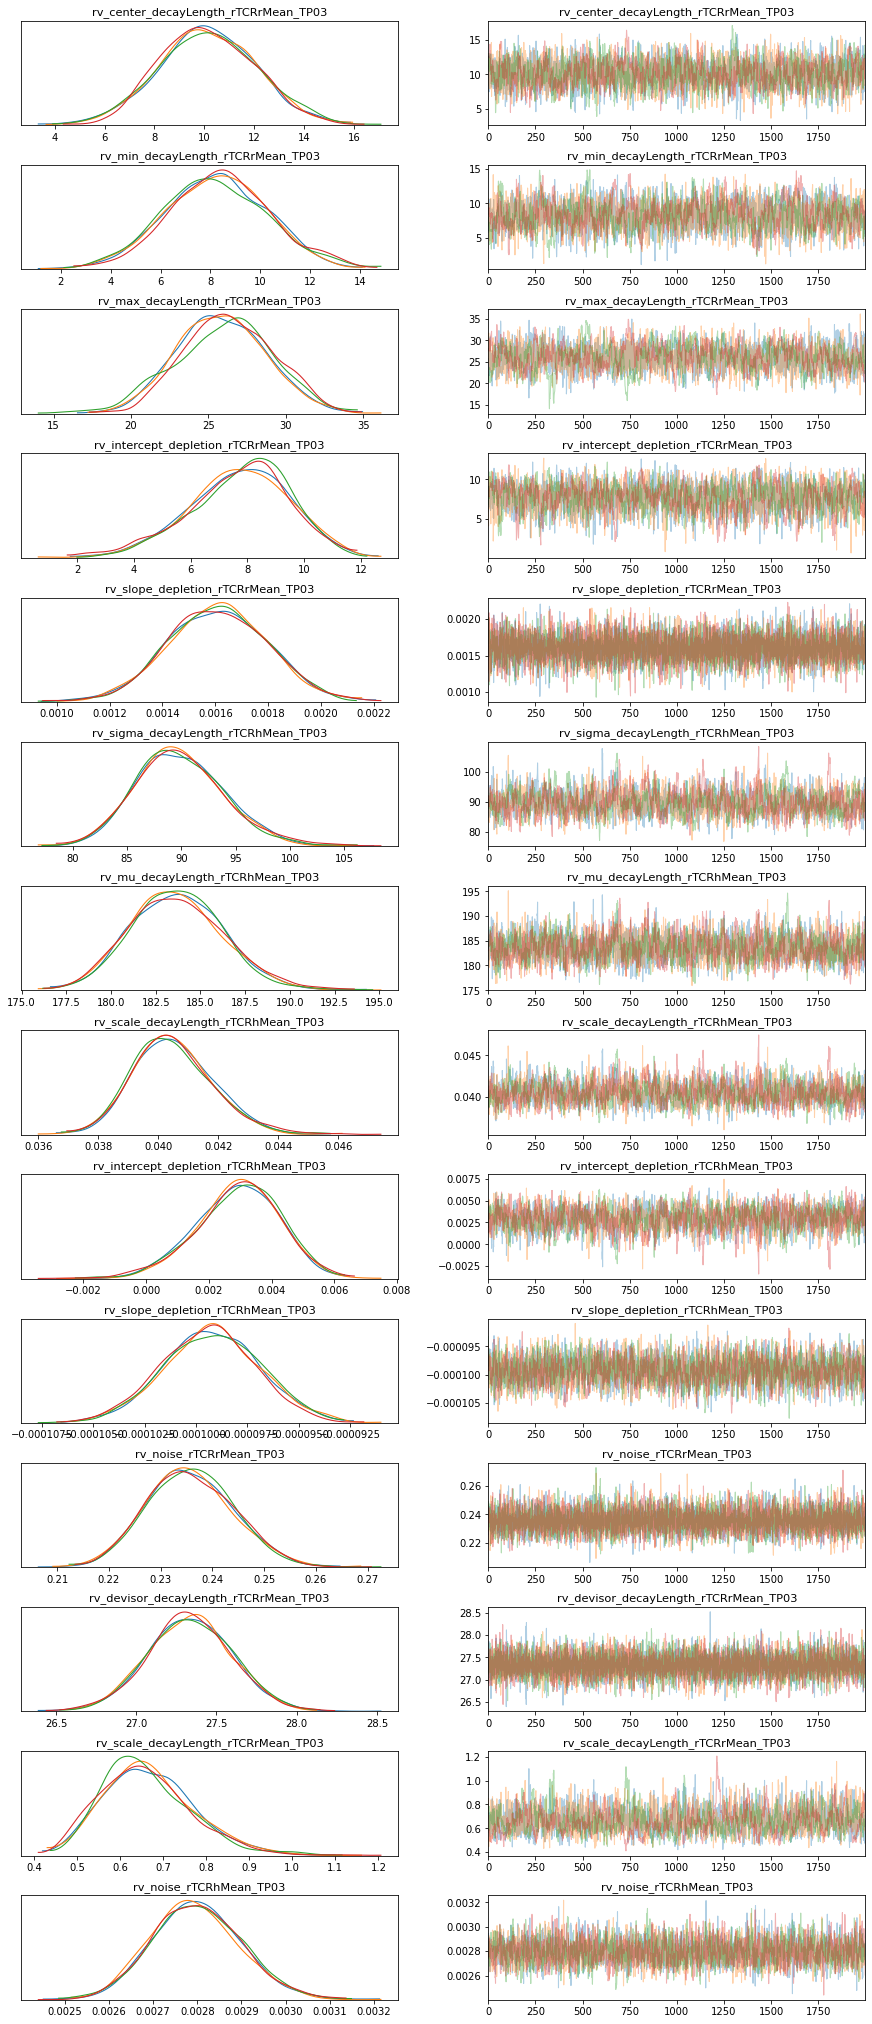

In [ ]:
pm.traceplot(trace3);

In [ ]:
pm.summary(trace3).round(3) # var_names=["mu", "tau"]

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
rv_center_decayLength_rTCRrMean_TP03,10.112,1.933,6.481,13.783,0.049,0.036,1541.0,1445.0,1546.0,2086.0,1.00
rv_min_decayLength_rTCRrMean_TP03,8.248,2.055,4.510,12.352,0.072,0.053,805.0,763.0,806.0,1108.0,1.00
rv_max_decayLength_rTCRrMean_TP03,25.955,2.934,20.411,31.208,0.125,0.089,549.0,549.0,550.0,955.0,1.00
rv_intercept_depletion_rTCRrMean_TP03,7.712,1.752,4.155,10.738,0.058,0.041,925.0,925.0,938.0,1683.0,1.01
rv_slope_depletion_rTCRrMean_TP03,0.002,0.000,0.001,0.002,0.000,0.000,8607.0,8523.0,8625.0,5311.0,1.00
rv_sigma_decayLength_rTCRhMean_TP03,89.823,4.040,82.499,97.520,0.143,0.102,799.0,792.0,822.0,1221.0,1.00
rv_mu_decayLength_rTCRhMean_TP03,183.663,2.585,179.046,188.655,0.083,0.059,959.0,957.0,975.0,1521.0,1.00
rv_scale_decayLength_rTCRhMean_TP03,0.040,0.001,0.038,0.043,0.000,0.000,855.0,850.0,882.0,1355.0,1.00
rv_intercept_depletion_rTCRhMean_TP03,0.003,0.001,0.000,0.005,0.000,0.000,927.0,927.0,958.0,1530.0,1.00
rv_slope_depletion_rTCRhMean_TP03,-0.000,0.000,-0.000,-0.000,0.000,0.000,2631.0,2618.0,2634.0,3017.0,1.00


In [ ]:
### heatmap = rTCRrMean: ###########################
# variables for decayLength parameter (x axis):
rv_center_decayLength_rTCRrMean_TP03_mean = trace3.rv_center_decayLength_rTCRrMean_TP03.mean()
rv_devisor_decayLength_rTCRrMean_TP03_mean = trace3.rv_devisor_decayLength_rTCRrMean_TP03.mean()
rv_min_decayLength_rTCRrMean_TP03_mean = trace3.rv_min_decayLength_rTCRrMean_TP03.mean()
rv_max_decayLength_rTCRrMean_TP03_mean = trace3.rv_max_decayLength_rTCRrMean_TP03.mean()
rv_scale_decayLength_rTCRrMean_TP03_mean = trace3.rv_scale_decayLength_rTCRrMean_TP03.mean()
# variables for decayLength parameter (y axis):
rv_intercept_depletion_rTCRrMean_TP03_mean = trace3.rv_intercept_depletion_rTCRrMean_TP03.mean()
rv_slope_depletion_rTCRrMean_TP03_mean = trace3.rv_slope_depletion_rTCRrMean_TP03.mean()
# mutual variables:
rv_noise_rTCRrMean_TP03_mean = trace3.rv_noise_rTCRrMean_TP03.mean()

### heatmap = rTCRhMean: ###########################
# variables for decayLength parameter (x axis):
rv_sigma_decayLength_rTCRhMean_TP03_mean = trace3.rv_sigma_decayLength_rTCRhMean_TP03.mean()
rv_mu_decayLength_rTCRhMean_TP03_mean = trace3.rv_mu_decayLength_rTCRhMean_TP03.mean()
rv_scale_decayLength_rTCRhMean_TP03_mean = trace3.rv_scale_decayLength_rTCRhMean_TP03.mean()
# variables for decayLength parameter (y axis):
rv_intercept_depletion_rTCRhMean_TP03_mean = trace3.rv_intercept_depletion_rTCRhMean_TP03.mean()
rv_slope_depletion_rTCRhMean_TP03_mean = trace3.rv_slope_depletion_rTCRhMean_TP03.mean()
# mutual variables:
rv_noise_rTCRhMean_TP03_mean = trace3.rv_noise_rTCRhMean_TP03.mean()


In [ ]:
### heatmap = rTCRrMean: ###########################
decayLength_rTCRrMean_TP03 = \
         rv_scale_decayLength_rTCRrMean_TP03_mean*\
        (rv_min_decayLength_rTCRrMean_TP03_mean + \
        (rv_max_decayLength_rTCRrMean_TP03_mean - \
         rv_min_decayLength_rTCRrMean_TP03_mean)*\
         np.exp(-0.5*(decayLength_array - \
                      rv_center_decayLength_rTCRrMean_TP03_mean)/\
                      rv_devisor_decayLength_rTCRrMean_TP03_mean))
        
depletion_rTCRrMean_TP03 = \
        rv_intercept_depletion_rTCRrMean_TP03_mean + \
        rv_slope_depletion_rTCRrMean_TP03_mean*depletion_array

validation_rTCRrMean_TP03 = decayLength_rTCRrMean_TP03 + depletion_rTCRrMean_TP03

### heatmap = rTCRhMean: ###########################
decayLength_rTCRhMean_TP03 = \
        rv_scale_decayLength_rTCRhMean_TP03_mean*\
        np.exp(-0.5*((decayLength_array - \
                      rv_mu_decayLength_rTCRhMean_TP03_mean)/\
                      rv_sigma_decayLength_rTCRhMean_TP03_mean)**2)
        
depletion_rTCRhMean_TP03 = rv_intercept_depletion_rTCRhMean_TP03_mean + \
rv_slope_depletion_rTCRhMean_TP03_mean*depletion_array

validation_rTCRhMean_TP03 = \
decayLength_rTCRhMean_TP03 + \
depletion_rTCRhMean_TP03 


<function matplotlib.pyplot.tight_layout>

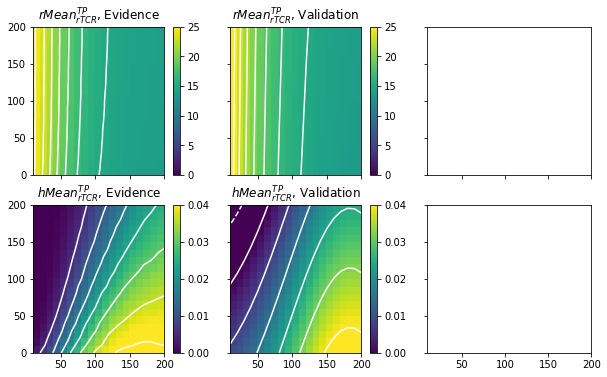

In [ ]:
fig, ax0 = plt.subplots(2,3, figsize=[10, 6], sharex=True, sharey=True)

vmin11 = 0; vmax11 = 25
im11 = ax0[0,0].pcolor(decayLength, depletion, rTCRrMean_array, vmin=vmin11, vmax=vmax11)
ax0[0,0].contour(decayLength, depletion, rTCRrMean_array, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im11, ax=ax0[0,0]) 
ax0[0,0].set_title('$rMean_{rTCR}^{TP}$, Evidence')
# ax0[0,0].set_xlabel('$t^{KS}(sec)$')
# ax0[0,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')


im12 = ax0[0,1].pcolor(decayLength, depletion, validation_rTCRrMean_TP03, vmin=vmin11, vmax=vmax11)
ax0[0,1].contour(decayLength, depletion, validation_rTCRrMean_TP03, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im12, ax=ax0[0,1]) 
ax0[0,1].set_title('$rMean_{rTCR}^{TP}$, Validation')
# ax0[0,1].set_xlabel('$t^{KS}(sec)$')
# ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT/nm)$')



vmin21 = 0; vmax21 = 0.04
im21 = ax0[1,0].pcolor(decayLength, depletion, rTCRhMean_array, vmin=vmin21, vmax=vmax21)
ax0[1,0].contour(decayLength, depletion, rTCRhMean_array, vmin=vmin21, vmax=vmax21, colors='w')
fig.colorbar(im21, ax=ax0[1,0]) 
ax0[1,0].set_title('$hMean_{rTCR}^{TP}$, Evidence')
# ax0[1,0].set_xlabel('$t^{KS}(sec)$')
# ax0[1,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')


im22 = ax0[1,1].pcolor(decayLength, depletion, validation_rTCRhMean_TP03, vmin=vmin21, vmax=vmax21)
ax0[1,1].contour(decayLength, depletion, validation_rTCRhMean_TP03, vmin=vmin21, vmax=vmax21, colors='w')
fig.colorbar(im22, ax=ax0[1,1]) 
ax0[1,1].set_title('$hMean_{rTCR}^{TP}$, Validation')
# ax0[1,1].set_xlabel('$t^{KS}(sec)$')
# ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT/nm)$')

plt.tight_layout

Test short:

In [ ]:
### heatmap1 = rTCRrMean: ###########################
# variables for decayLength parameter (x axis):
h1_x_cen = trace3.rv_center_decayLength_rTCRrMean_TP03.mean()
h1_x_dev = trace3.rv_devisor_decayLength_rTCRrMean_TP03.mean()
h1_x_min = trace3.rv_min_decayLength_rTCRrMean_TP03.mean()
h1_x_max = trace3.rv_max_decayLength_rTCRrMean_TP03.mean()
h1_x_scale = trace3.rv_scale_decayLength_rTCRrMean_TP03.mean()
# variables for decayLength parameter (y axis):
h1_y_intercept = trace3.rv_intercept_depletion_rTCRrMean_TP03.mean()
h1_y_slope = trace3.rv_slope_depletion_rTCRrMean_TP03.mean()
# mutual variables:
h1_noise = trace3.rv_noise_rTCRrMean_TP03.mean()

### heatmap2 = rTCRhMean: ###########################
# variables for decayLength parameter (x axis):
h2_x_sigma = trace3.rv_sigma_decayLength_rTCRhMean_TP03.mean()
h2_x_mu = trace3.rv_mu_decayLength_rTCRhMean_TP03.mean()
h2_x_scale = trace3.rv_scale_decayLength_rTCRhMean_TP03.mean()
# variables for decayLength parameter (y axis):
h2_y_intercept = trace3.rv_intercept_depletion_rTCRhMean_TP03.mean()
h2_y_slope = trace3.rv_slope_depletion_rTCRhMean_TP03.mean()
# mutual variables:
h2_noise = trace3.rv_noise_rTCRhMean_TP03.mean()



In [ ]:
x = decayLength
y = depletion

X = decayLength_array
Y = depletion_array

### heatmap = rTCRrMean: ###########################
h1_evidence = rTCRrMean_array

h1_x = h1_x_scale*(h1_x_min + (h1_x_max - h1_x_min)*\
                   np.exp(-0.5*(X - h1_x_cen)/h1_x_dev))
        
h1_y = h1_y_intercept + hy1_slope*Y

h1_validation = h1_x + h1_y

### heatmap = rTCRhMean: ###########################
h2_evidence = rTCRhMean_array

h2_x = h2_x_scale*np.exp(-0.5*((X - h2_x_mu)/h2_x_sigma)**2)
        
h2_y = h2_y_intercept + h2_y_slope*Y

h2_validation = h2_x + h2_y


<function matplotlib.pyplot.tight_layout>

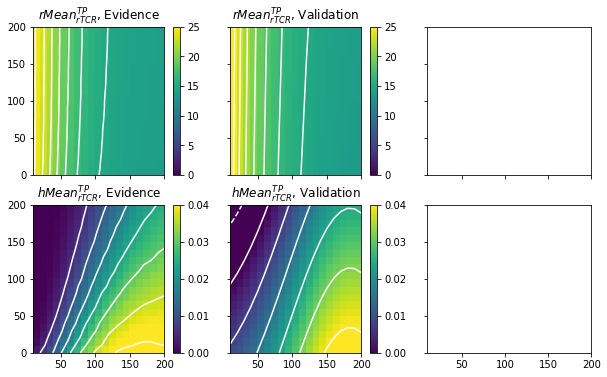

In [ ]:
fig, ax1 = plt.subplots(2,3, figsize=[10, 6], sharex=True, sharey=True)

vmin11 = 0; vmax11 = 25
im11 = ax1[0,0].pcolor(x, y, h1_evidence, vmin=vmin11, vmax=vmax11)
ax1[0,0].contour(x, y, h1_evidence, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im11, ax=ax1[0,0]) 
ax1[0,0].set_title('$rMean_{rTCR}^{TP}$, Evidence')
# ax1[0,0].set_xlabel('$t^{KS}(sec)$')
# ax1[0,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')


im12 = ax1[0,1].pcolor(x, y, h1_validation, vmin=vmin11, vmax=vmax11)
ax1[0,1].contour(x, y, h1_validation, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im12, ax=ax1[0,1]) 
ax1[0,1].set_title('$rMean_{rTCR}^{TP}$, Validation')
# ax1[0,1].set_xlabel('$t^{KS}(sec)$')
# ax1[0,1].set_ylabel('$\kappa^{KS}(K_BT/nm)$')



vmin21 = 0; vmax21 = 0.04
im21 = ax1[1,0].pcolor(x, y, h2_evidence, vmin=vmin21, vmax=vmax21)
ax1[1,0].contour(x, y, h2_evidence, vmin=vmin21, vmax=vmax21, colors='w')
fig.colorbar(im21, ax=ax1[1,0]) 
ax1[1,0].set_title('$hMean_{rTCR}^{TP}$, Evidence')
# ax1[1,0].set_xlabel('$t^{KS}(sec)$')
# ax1[1,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')


im22 = ax1[1,1].pcolor(x, y, h2_validation, vmin=vmin21, vmax=vmax21)
ax1[1,1].contour(x, y, h2_validation, vmin=vmin21, vmax=vmax21, colors='w')
fig.colorbar(im22, ax=ax1[1,1]) 
ax1[1,1].set_title('$hMean_{rTCR}^{TP}$, Validation')
# ax1[1,1].set_xlabel('$t^{KS}(sec)$')
# ax1[1,1].set_ylabel('$\kappa^{KS}(K_BT/nm)$')

plt.tight_layout